## First things first! Linear regression

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
parent = os.path.abspath(os.path.join(cwd,'..'))
print(parent)
#plt.style.use(parent+'\plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

H:\My Documents\GitHub\Data_Science_Ipython_notebooks


In [141]:
dataset = pd.read_csv('clean_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   incentive              1197 non-null   int64  
 2   no_of_workers          1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 56.2 KB


## Green - kinda good, Red - kinda bad

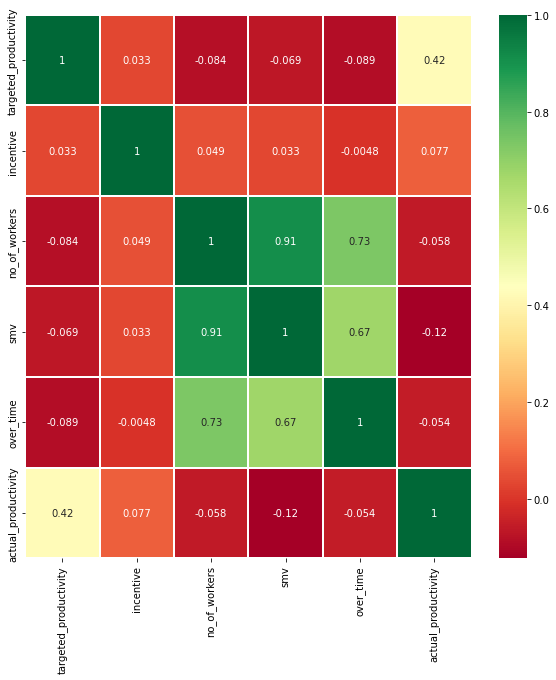

In [142]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True,
            linewidth=.2, cmap="RdYlGn")
plt.show();

Doing a simple pair plot with possible feature which can have a correlation with productivity

There seems to be no visible cotrrelation between the features. This will result in poor peformance of a simple linear regression model (there is almost no incentive, yeesh!)

In [143]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('actual_productivity')
test_labels = test_features.pop('actual_productivity')

# Making sure that the data is in correct shape and format
print(f'Train features shape = {train_features.shape}')
print(f'Test features shape = {test_features.shape}')
print(f'Train labels shape = {train_labels.shape}')
print(f'Test labels shape = {test_labels.shape}')

Train features shape = (958, 5)
Test features shape = (239, 5)
Train labels shape = (958,)
Test labels shape = (239,)


In [144]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [145]:
# Normalizing the training data
scalar = StandardScaler()
X_train = scalar.fit_transform(train_features)

In [146]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_train, train_labels)
train_pred = sgdr.predict(X_train)

print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(f'Score = {sgdr.score(X_train, train_labels)}')
print(f'RMSE = {mean_squared_error(train_labels, train_pred ,squared = False)}')

SGDRegressor(max_iter=10000)
Number of iterations completed: 7, Number of weight updates: 6707.0
Score = 0.20955503344172655
RMSE = 0.15479512611149057


As expected the simple linear regressor is performing very poorly and I do not see any potential improvement possible with polynomial regression as well. Time to move on to Random forest regressor. 

## Random forest regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor() 

## Hyperparameter tuning

In [148]:
# Number of trees in the model
n_estimators = [int(x) for x in np.linspace(100,1000,10)]; print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In this notebook we will use keras to build our neural networks

## Building the neural network model

In [149]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization

In [150]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential

In [151]:
model = Sequential(
    [
        Dense(80, activation = 'relu'),
        Dense(60, activation = 'relu'),
        Dense(40, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ], name = "Worker_productivity" 
)

In [152]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [153]:
model.fit(X_train, train_labels, epochs = 1000)

Epoch 1/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.6101
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5652
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5582
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5555
Epoch 5/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5535
Epoch 6/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5524
Epoch 7/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5515
Epoch 8/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5499
Epoch 9/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5495
Epoch 10/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5478
Epoch 11/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5464
Epoch 12/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5464
Epoch 13/1000
30/30 [====

30/30 [==============================] - 0s 1ms/step - loss: 0.5360
Epoch 102/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5366
Epoch 103/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5359
Epoch 104/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 105/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5349
Epoch 106/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5363
Epoch 107/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5354
Epoch 108/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 109/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 110/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 111/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5346
Epoch 112/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5353
Epoch 113/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5308
Epoch 200/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5300
Epoch 201/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5302
Epoch 202/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5305
Epoch 203/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5300
Epoch 204/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5314
Epoch 205/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5314
Epoch 206/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5312
Epoch 207/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5295
Epoch 208/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5302
Epoch 209/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 210/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 211/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5308
Epoch 298/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5273
Epoch 299/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5304
Epoch 300/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5284
Epoch 301/1000
30/30 [==============================] - 0s 993us/step - loss: 0.5278
Epoch 302/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5271
Epoch 303/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 304/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5301
Epoch 305/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 306/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5277
Epoch 307/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 308/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5271
Epoch 309/1000
30

30/30 [==============================] - 0s 1ms/step - loss: 0.5266
Epoch 396/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5252
Epoch 397/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5269
Epoch 398/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 399/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5256
Epoch 400/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5260
Epoch 401/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5253
Epoch 402/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 403/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5253
Epoch 404/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5244
Epoch 405/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5249
Epoch 406/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 407/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5249
Epoch 494/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 495/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 496/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5251
Epoch 497/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 498/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 499/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5236
Epoch 500/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5236
Epoch 501/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5237
Epoch 502/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5243
Epoch 503/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 504/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 505/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5228
Epoch 592/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5240
Epoch 593/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5240
Epoch 594/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5232
Epoch 595/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5234
Epoch 596/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 597/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5234
Epoch 598/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5230
Epoch 599/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 600/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 601/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 602/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 603/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 690/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5232
Epoch 691/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 692/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 693/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 694/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5217
Epoch 695/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 696/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 697/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5217
Epoch 698/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5218
Epoch 699/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 700/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5239
Epoch 701/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5204
Epoch 788/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5206
Epoch 789/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 790/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 791/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5219
Epoch 792/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5217
Epoch 793/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5218
Epoch 794/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 795/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5225
Epoch 796/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5206
Epoch 797/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5202
Epoch 798/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5201
Epoch 799/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5195
Epoch 886/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5204
Epoch 887/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5203
Epoch 888/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5199
Epoch 889/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5212
Epoch 890/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5188
Epoch 891/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 892/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5199
Epoch 893/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5201
Epoch 894/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 895/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5201
Epoch 896/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5201
Epoch 897/1000
30/3

30/30 [==============================] - 0s 1ms/step - loss: 0.5182
Epoch 984/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5173
Epoch 985/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5176
Epoch 986/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5178
Epoch 987/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5176
Epoch 988/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5179
Epoch 989/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5166
Epoch 990/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5167
Epoch 991/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5175
Epoch 992/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5162
Epoch 993/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5187
Epoch 994/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5181
Epoch 995/1000
30/3

In [154]:
train_pred = model.predict(X_train)
print(f'RMSE = {mean_squared_error(train_labels, train_pred ,squared = False)}')

30/30 [==============================] - 0s 2ms/step
RMSE = 0.09313640226196392


Text(0, 0.5, 'Predicted')

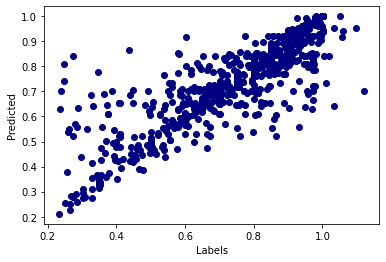

In [155]:
fig4, ax4 = plt.subplots()
ax4.scatter(train_labels, train_pred)
ax4.set_xlabel('Labels')
ax4.set_ylabel('Predicted')